Data can be download from the following link:
https://search.earthdata.nasa.gov/search/granules?p=C2015490897-GHRC_DAAC&pg[0][v]=f&pg[0][gsk]=-start_date&g=G2018214918-GHRC_DAAC&q=isslis_v1_fin&tl=1659080704!3!!&lat=-16.3125&long=-217.6875&zoom=0


Reference:

https://ghrc.nsstc.nasa.gov/home/data-recipes/iss-lis-lightning-flash-location-quickview-using-python-27-and-gis

* Last modified 7-29-2022



In [1]:
import netCDF4 as nc
import pandas as pd
import dask.array as dsk
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fname = 'ISS_LIS_SC_V1.0_20170430_FIN_01850.nc'

In [3]:
# read netCDF file
iss_lis = nc.Dataset(fname,'r')

In [4]:
# display keys 
iss_lis.variables.keys()

dict_keys(['raster_image', 'raster_image_color_table', 'orbit_summary_id_number', 'orbit_summary_TAI93_start', 'orbit_summary_UTC_start', 'orbit_summary_GPS_start', 'orbit_summary_TAI93_end', 'orbit_summary_start_longitude', 'orbit_summary_end_longitude', 'orbit_summary_point_data_count', 'orbit_summary_point_data_address', 'orbit_summary_one_second_count', 'orbit_summary_one_second_address', 'orbit_summary_summary_image_count', 'orbit_summary_summary_image_address', 'orbit_summary_inspection_code', 'orbit_summary_configuration_code', 'point_summary_parent_address', 'point_summary_event_count', 'point_summary_event_address', 'point_summary_group_count', 'point_summary_group_address', 'point_summary_flash_count', 'point_summary_flash_address', 'point_summary_area_count', 'point_summary_area_address', 'point_summary_bg_count', 'point_summary_bg_address', 'point_summary_vt_count', 'point_summary_vt_address', 'lightning_area_TAI93_time', 'lightning_area_delta_time', 'lightning_area_observe

In [5]:
# extract the data and convert in to pandas data frame

# flash_lat = iss_lis.variables['lightning_flash_lat'][:].reshape([-1,1]);
# flash_lon = iss_lis.variables['lightning_flash_lon'][:].reshape([-1,1]);

# flash_loc = dsk.concatenate([flash_lat,flash_lon],axis=1);
# flash_loc = pd.DataFrame(flash_loc,columns=['lightning_flash_lat','lightning_flash_lon'])
# flash_loc

#======================================================
flash_loc = pd.DataFrame(iss_lis.variables['lightning_flash_location'][:],
             columns=['lightning_flash_lat','lightning_flash_lon'])

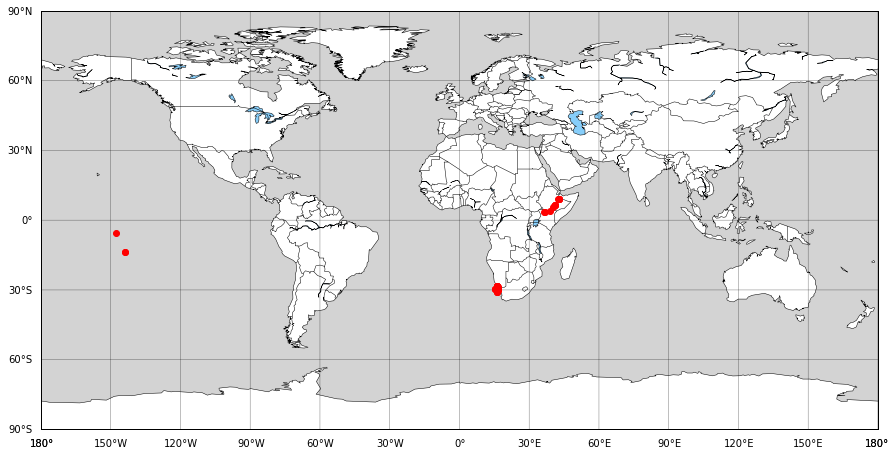

In [6]:
# plot data

fig = plt.figure(figsize=(15,15))
map = Basemap(projection='cyl',lat_0=0,resolution='c',suppress_ticks=True)
map.drawmapboundary(fill_color = 'lightgray')
map.fillcontinents(color='w',lake_color='lightskyblue')
map.drawcoastlines(linewidth=0.5)
map.drawcountries(linewidth=0.5)
map.drawmeridians(np.arange(0,390,30),linewidth = 0.5,labels=[0,0,0,1])
map.drawparallels(np.arange(-90,120,30),linewidth = 0.5,labels=[1,0,0,0])

map.plot(flash_loc.loc[:,'lightning_flash_lon'],flash_loc.loc[:,'lightning_flash_lat'],
         'o',markerfacecolor = 'r',markeredgecolor = 'r');
